In [1]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn

import numpy as np
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPRegressor

# D
Creating the Franke function with noise.

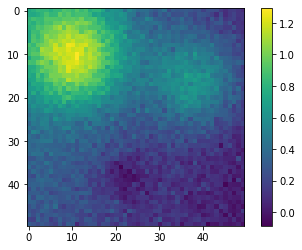

In [2]:
n=50
x = np.linspace(0,1,n)
y = x
x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.05
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)

plt.imshow(frank)
plt.colorbar()
plt.show()

frank=frank.ravel()
frank=frank.reshape([len(frank),1])

In [17]:
design=fx.DesignDesign(x,y,5)
design=np.delete(design, [0,1], axis=1)
n_features=design.shape[1]

neural_net = nn.ANN(lmb=10e-05, bias=0.5, eta=0.1, mode= 'regression')            
neural_net.add_layers(n_features=[n_features,50,20], n_neurons = [50,20,1] , n_layers=3)

activation = [lrf.relu, lrf.sigmoid, lrf.nooutact]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.nooutact]


start = time.time()
epochs=5000
batch_size=500
neural_net.train(epochs, batch_size, design,frank,activation,derivative, verbose=False)
end = time.time()
print(end - start)

53.850855112075806


In [18]:
pred = neural_net.feed_out(design, activation)['2']

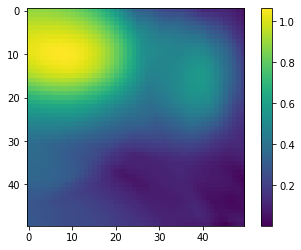

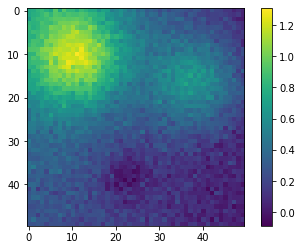

0.004539114056922419

In [19]:
plt.imshow(pred.reshape([n,n]))
plt.colorbar()
plt.show()
plt.imshow(frank.reshape([n,n]))
plt.colorbar()
plt.show()

fx.MSE(pred,frank)

-0.012918491391164855
0.0016022740744264794
0.017631448115517645
-0.09771054112663523
-0.0862579965499879
0.005122366677273282


C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0002390113306666164
0.5717756361341058
0.5546312115541866
0.5576487408408191
0.519699020900039
0.4468124702853269
0.12449778054871063
-0.00022473020479862882
0.7529931957750612
0.7224804443351998
0.7640532055735881
0.6793741689168382
0.631461975708522
0.4140668128555486
-0.00018235951344580667
0.9313047428123421
0.9266225583049829
0.9168777288269199
0.8656965544868859
0.7509873531481285
0.48724704994310053
-0.002019406291051906
0.951462786716479
0.9432353284897673
0.9367903396123705
0.8368813216443558
0.7544602466315489
0.4848928726825363
-0.030574884849463354
-0.0168369808847304
-0.02194495272746111
-0.007620379518294085
-0.002607967838092806
-1.0361057142990377
-0.008163156001216088
-0.0008347995591806434
-0.020464406965656105
-0.1259517114590094
-0.05797346319118657
-0.13021452232729347
-0.8960251331650353
-1.9905452133291943
-0.0008772875672602432


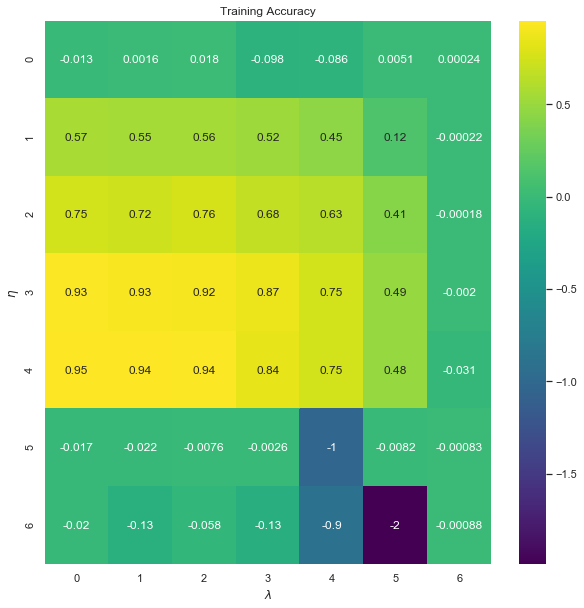

In [3]:
design=fx.DesignDesign(x,y,5)
design=np.delete(design, [0,1], axis=1)

X_train = design
Y_train = frank.ravel()

n_hidden_neurons = (50,20)
epochs = 1000
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
sns.set()
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPRegressor(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, Y_train)
        DNN_scikit[i][j] = dnn
        train_accuracy[i][j] = dnn.score(X_train, Y_train)
        print(train_accuracy[i][j])
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

In [4]:
etamax=eta_vals[4]
lmbmax=lmbd_vals[0]

dnn = MLPRegressor(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbmax, learning_rate_init=etamax, max_iter=epochs*100)
dnn.fit(X_train, Y_train)
DNN_scikit = dnn
train_accuracy = dnn.score(X_train, Y_train)
print(train_accuracy)

0.9478521198989305


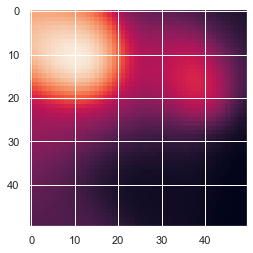

0.004454088819215164


In [5]:
pred = dnn.predict(X_train)


plt.imshow(pred.reshape([n,n]))
plt.show()

print(fx.MSE(pred,frank.ravel()))